# Sample Interview

### Import Libraries and File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_excel('data.xlsx')

### Preliminary EDA - Level 0 EDA - (No transformation yet)

In [3]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Example usage:
# Assuming df is your DataFrame
summary_df = column_summary(df)
display(summary_df)
summary_df.to_csv('initial0_EDA_data.csv')

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,C_ID,int64,0,66083,47857,"{59688: 6, 22944: 6, 10855: 6, 17605: 6, 10756..."
1,C_AGE,int64,0,66083,100,"{47: 1855, 52: 1779, 49: 1771, 51: 1764, 50: 1..."
2,C_EDU,object,38464,27619,10,"{'Degree': 11222, 'Diploma': 6329, 'O-Levels':..."
3,C_HSE,object,43916,22167,14,"{'HDB 4-5 ROOM': 15257, 'PRIVATE CONDOMINIUM':..."
4,PC,float64,486,65597,16046,"{0.0: 2082, 10147.0: 35, 34.0: 31, 21102.0: 31..."
5,INCM_TYP,float64,29466,36617,8,"{2.0: 9064, 6.0: 6493, 5.0: 5923, 4.0: 5867, 3..."
6,gn_occ,object,878,65205,7,"{'PMEB': 34912, 'BLUE COLLAR': 7552, 'HOUSEWIF..."
7,NUM_PRD,int64,0,66083,9,"{1: 23517, 2: 22286, 3: 13209, 4: 5000, 5: 160..."
8,CASATD_CNT,float64,25092,40991,23,"{1.0: 26017, 2.0: 8149, 3.0: 3425, 4.0: 1601, ..."
9,MTHCASA,float64,27038,39045,36944,"{0.0: 232, 8.0: 19, 10.0: 18, 8.01: 15, 500.06..."


In [4]:
display(df['C_ID'].value_counts())
print()
display(df['C_ID'].value_counts().value_counts())

C_ID
59688    6
22944    6
10855    6
17605    6
10756    6
        ..
62908    1
62871    1
63906    1
62825    1
22584    1
Name: count, Length: 47857, dtype: int64

count
1    33471
2    11213
3     2602
4      484
5       78
6        9
Name: count, dtype: int64

#### Some basic understanding

In [5]:
print(df.head())

   C_ID  C_AGE     C_EDU                  C_HSE       PC  INCM_TYP       gn_occ  NUM_PRD  CASATD_CNT   MTHCASA   MAXCASA   MINCASA         DRvCR      MTHTD      MAXTD  Asset value  HL_tag  AL_tag  pur_price_avg        UT_AVE     MAXUT  N_FUNDS      CC_AVE  MAX_MTH_TRN_AMT  MIN_MTH_TRN_AMT  AVG_TRN_AMT  ANN_TRN_AMT  ANN_N_TRX   CC_LMT     C_seg
0  1443     65   Masters  EXECUTIVE CONDOMINIUM  19250.0       6.0         PMEB        3         8.0   6896.91   4899.08    910.88  1.020768e+06  105000.00   25000.00    111896.91     NaN     NaN            NaN           NaN       NaN      NaN   13.233333              NaN              NaN          NaN          NaN        NaN  34500.0  AFFLUENT
1  1559     86  O-Levels    PRIVATE CONDOMINIUM  99018.0       2.0         PMEB        4        13.0  51714.78  35740.55   1318.25  8.326420e+00  575571.97  135026.15    627286.75     NaN     NaN            NaN           NaN       NaN      NaN  727.629167          8530.88           273.44  2296.713333     2

In [6]:
# Change dtypes to the correct dtype first
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66083 entries, 0 to 66082
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   C_ID             66083 non-null  int64  
 1   C_AGE            66083 non-null  int64  
 2   C_EDU            27619 non-null  object 
 3   C_HSE            22167 non-null  object 
 4   PC               65597 non-null  float64
 5   INCM_TYP         36617 non-null  float64
 6   gn_occ           65205 non-null  object 
 7   NUM_PRD          66083 non-null  int64  
 8   CASATD_CNT       40991 non-null  float64
 9   MTHCASA          39045 non-null  float64
 10  MAXCASA          39045 non-null  float64
 11  MINCASA          39045 non-null  float64
 12  DRvCR            29708 non-null  float64
 13  MTHTD            14100 non-null  float64
 14  MAXTD            14100 non-null  float64
 15  Asset value      66083 non-null  float64
 16  HL_tag           2368 non-null   float64
 17  AL_tag      

In [7]:
print(df.describe())

               C_ID         C_AGE            PC      INCM_TYP       NUM_PRD    CASATD_CNT       MTHCASA       MAXCASA       MINCASA         DRvCR         MTHTD         MAXTD   Asset value  HL_tag  AL_tag  pur_price_avg        UT_AVE         MAXUT      N_FUNDS         CC_AVE  MAX_MTH_TRN_AMT  MIN_MTH_TRN_AMT    AVG_TRN_AMT   ANN_TRN_AMT     ANN_N_TRX         CC_LMT
count  66083.000000  66083.000000  65597.000000  36617.000000  66083.000000  40991.000000  3.904500e+04  3.904500e+04  3.904500e+04  2.970800e+04  1.410000e+04  1.410000e+04  6.608300e+04  2368.0  5587.0   5.585000e+03  2.678000e+03  2.678000e+03  2678.000000   17073.000000     11733.000000     11733.000000   11733.000000  1.173300e+04  11733.000000   47744.000000
mean   41321.249111     52.357429  43249.703264      3.791709      2.097983      1.727867  1.614598e+04  1.544520e+04  1.317587e+04  3.663201e+04  1.075480e+05  6.738959e+04  3.606658e+04     1.0     1.0   1.247173e+05  4.562678e+04  5.207089e+04     1.447722    143

In [8]:
print(df.isnull().sum())

C_ID                   0
C_AGE                  0
C_EDU              38464
C_HSE              43916
PC                   486
INCM_TYP           29466
gn_occ               878
NUM_PRD                0
CASATD_CNT         25092
MTHCASA            27038
MAXCASA            27038
MINCASA            27038
DRvCR              36375
MTHTD              51983
MAXTD              51983
Asset value            0
HL_tag             63715
AL_tag             60496
pur_price_avg      60498
UT_AVE             63405
MAXUT              63405
N_FUNDS            63405
CC_AVE             49010
MAX_MTH_TRN_AMT    54350
MIN_MTH_TRN_AMT    54350
AVG_TRN_AMT        54350
ANN_TRN_AMT        54350
ANN_N_TRX          54350
CC_LMT             18339
C_seg                  0
dtype: int64


In [9]:
print(df.duplicated().sum())

0


C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


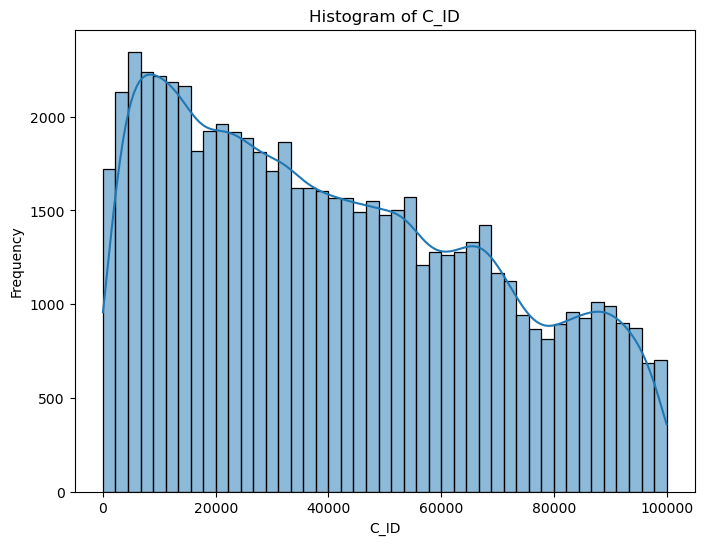

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


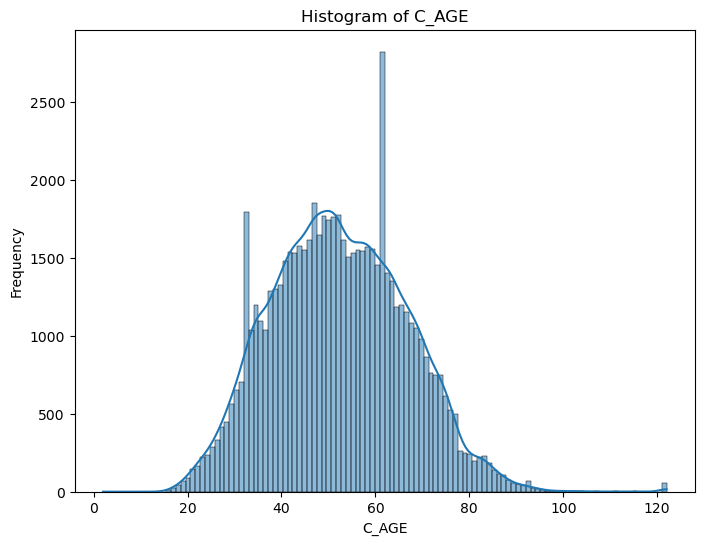

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


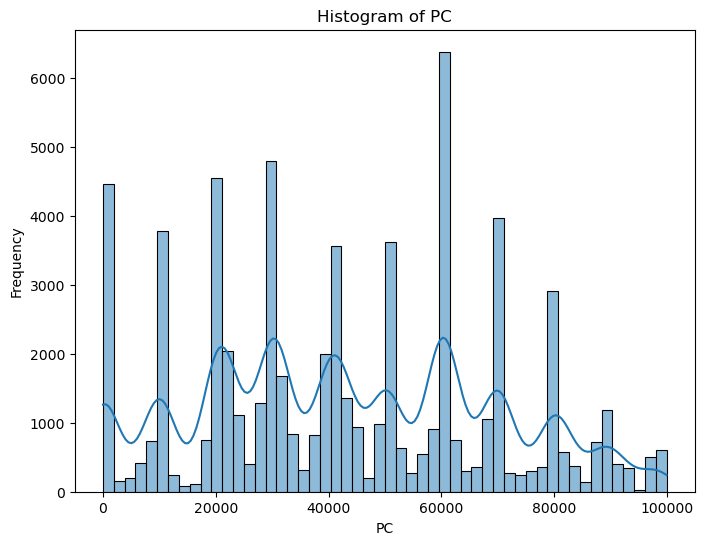

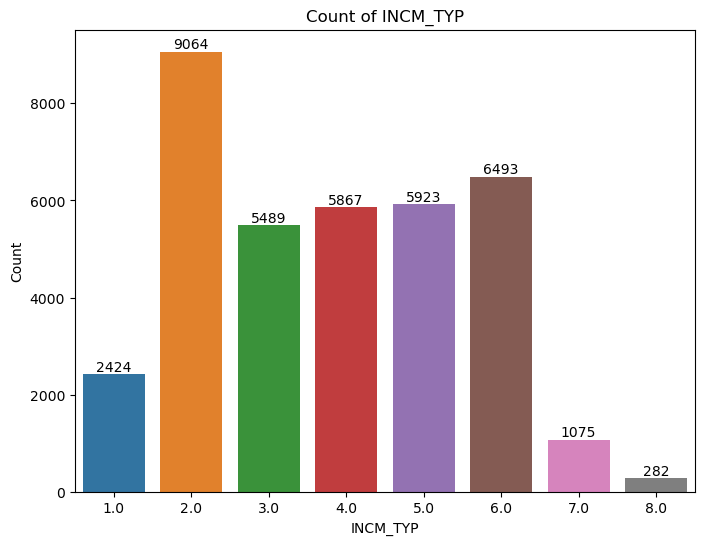

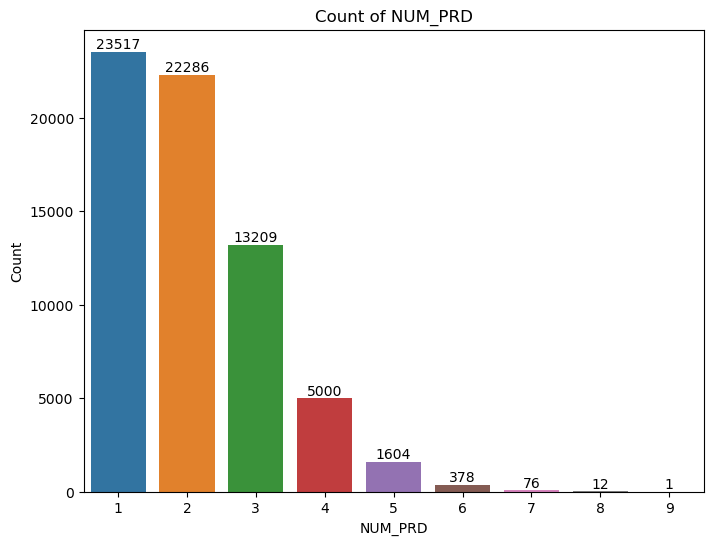

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


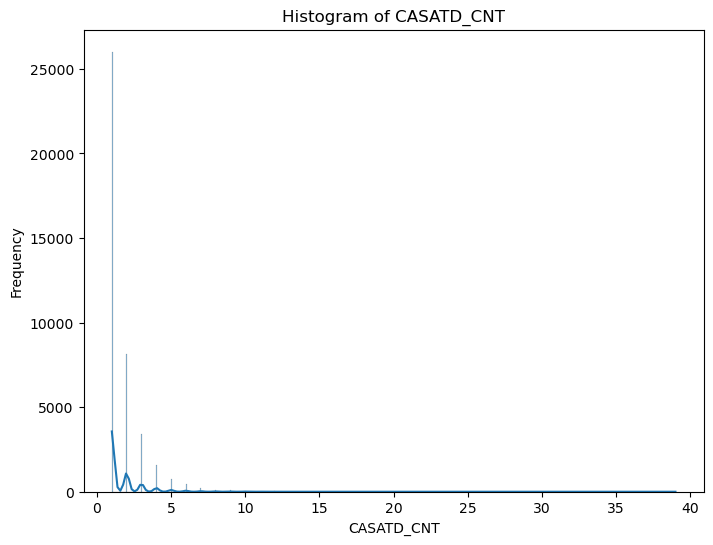

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


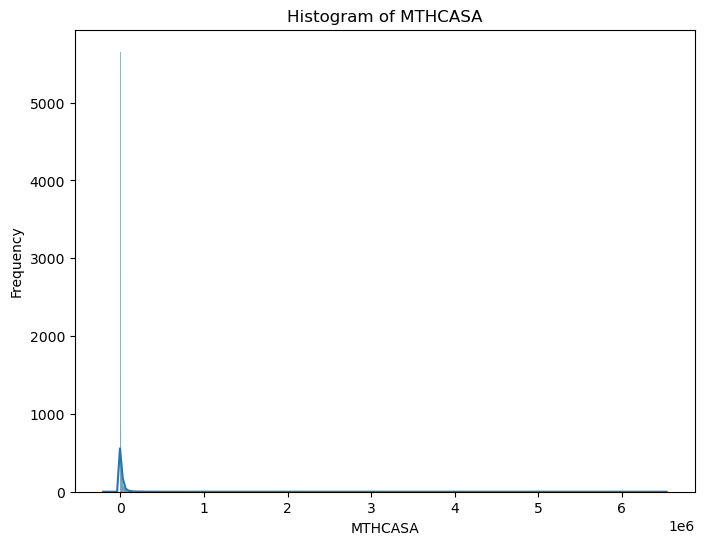

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


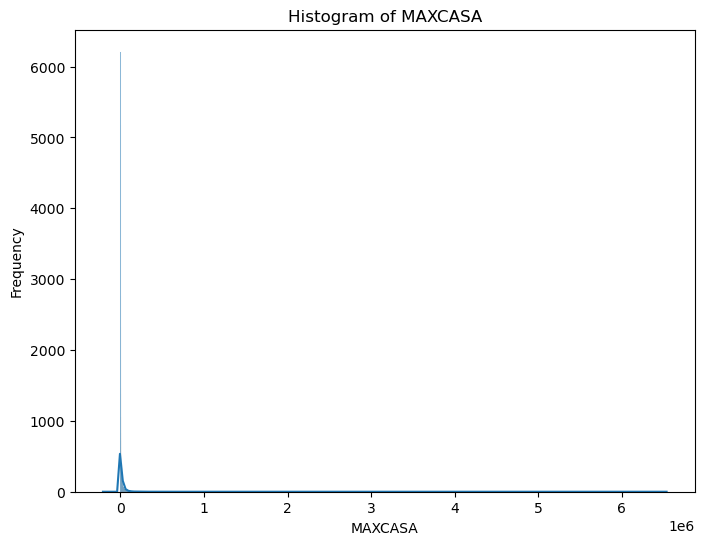

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


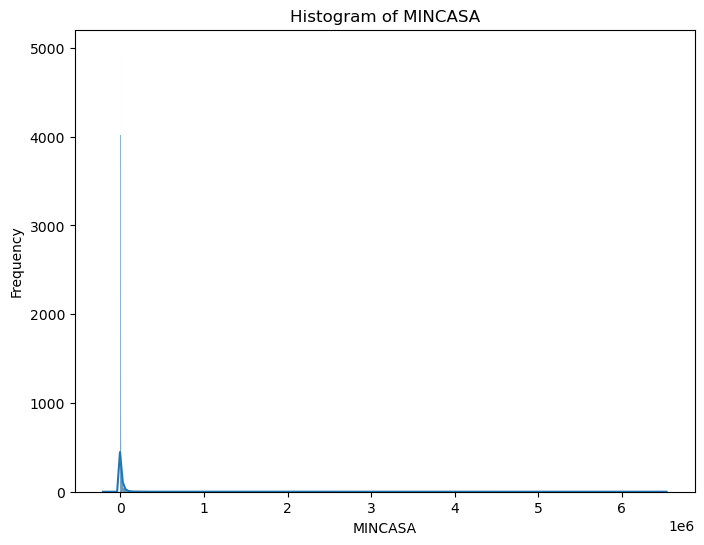

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


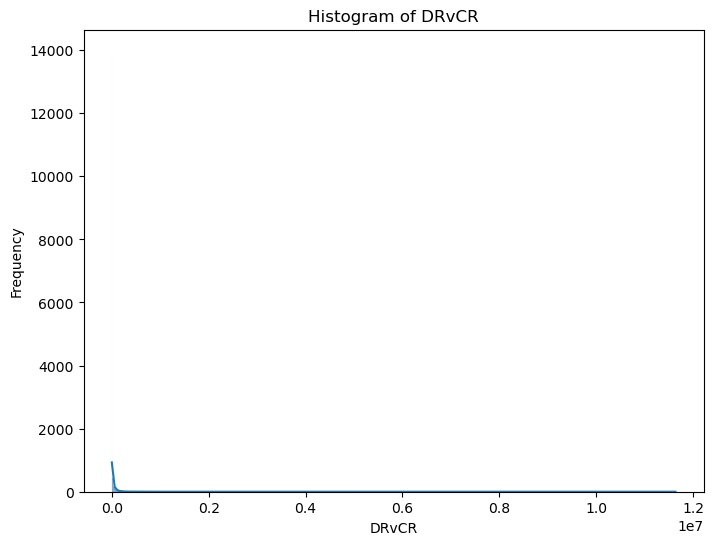

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


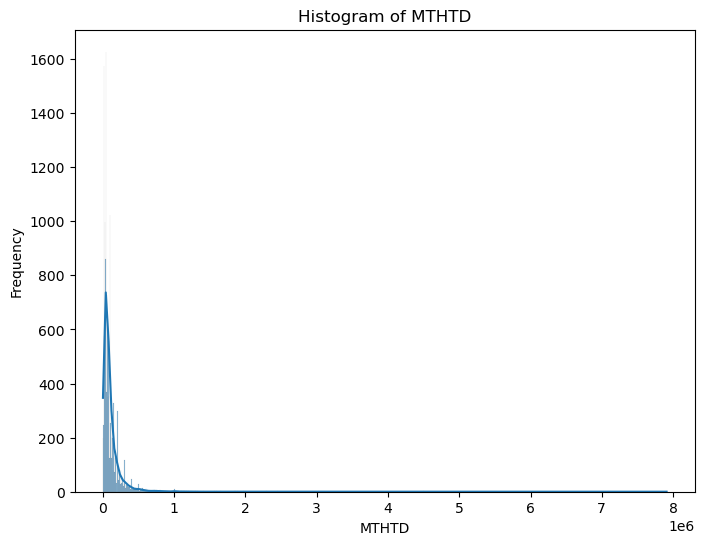

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


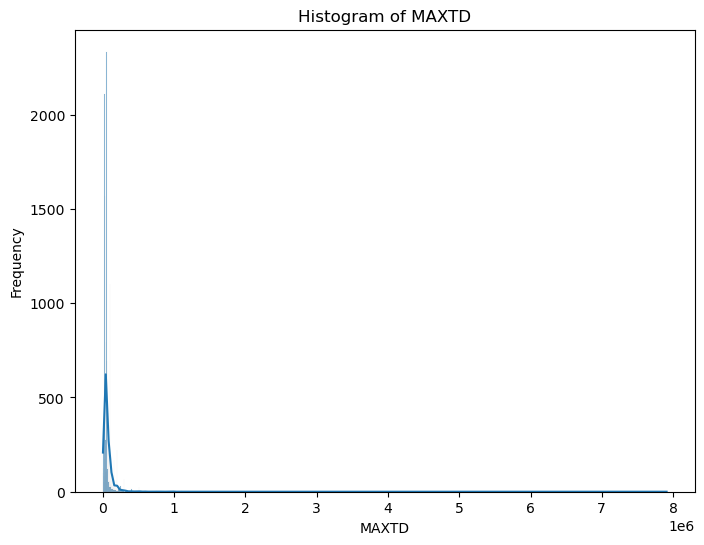

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


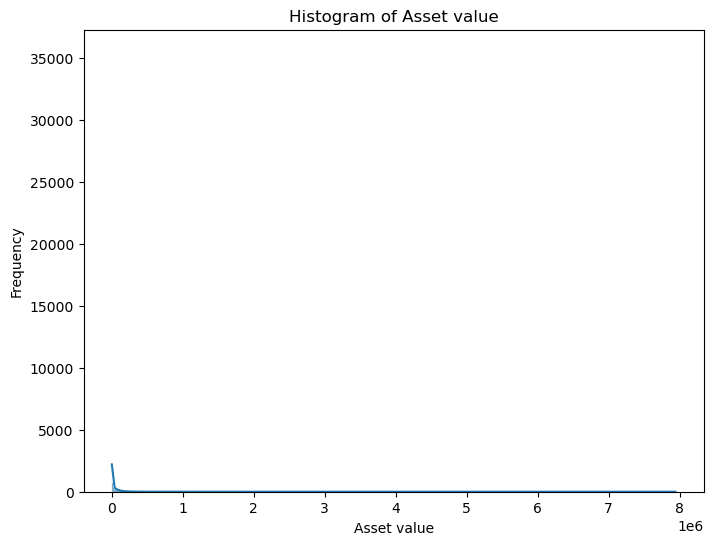

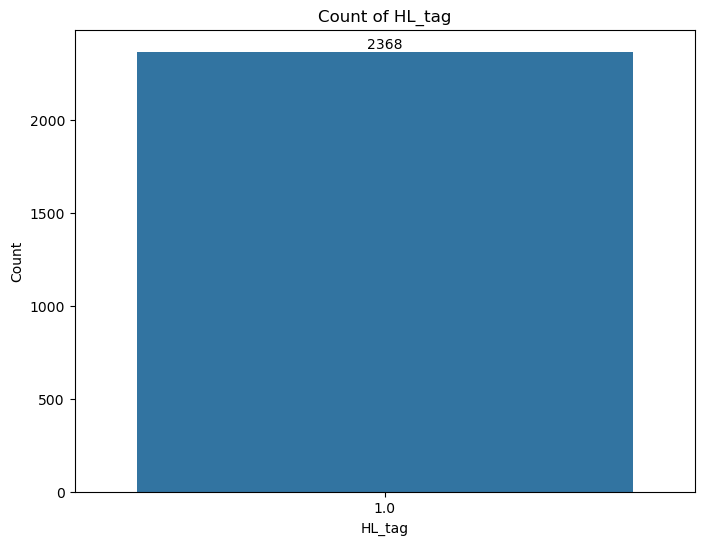

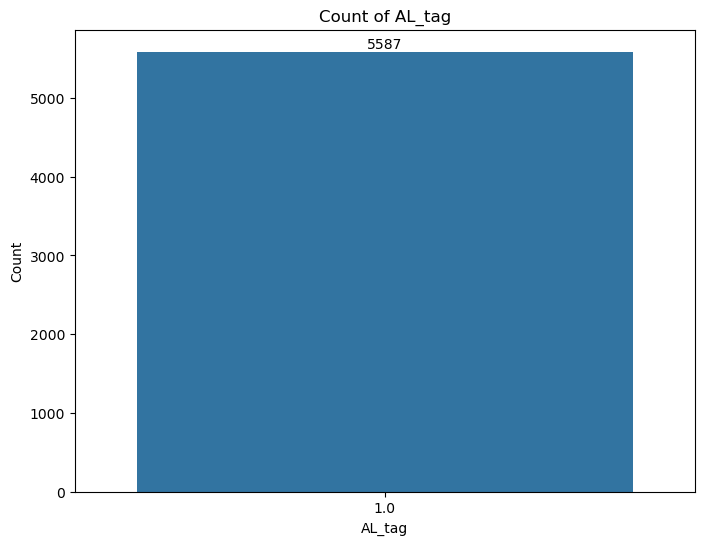

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


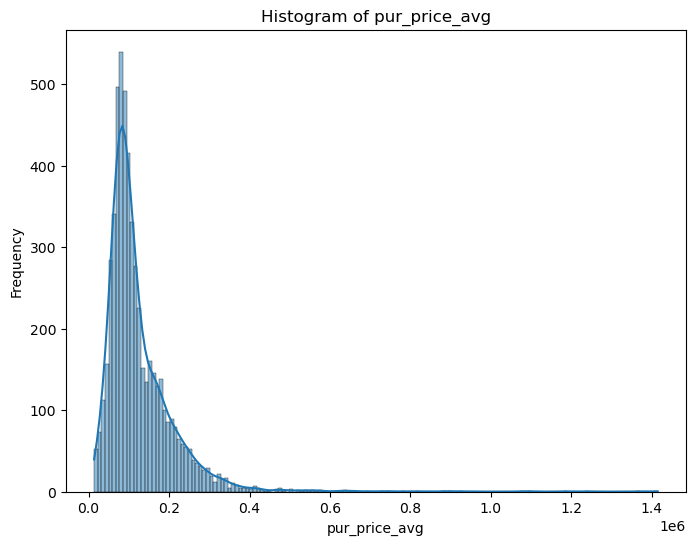

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


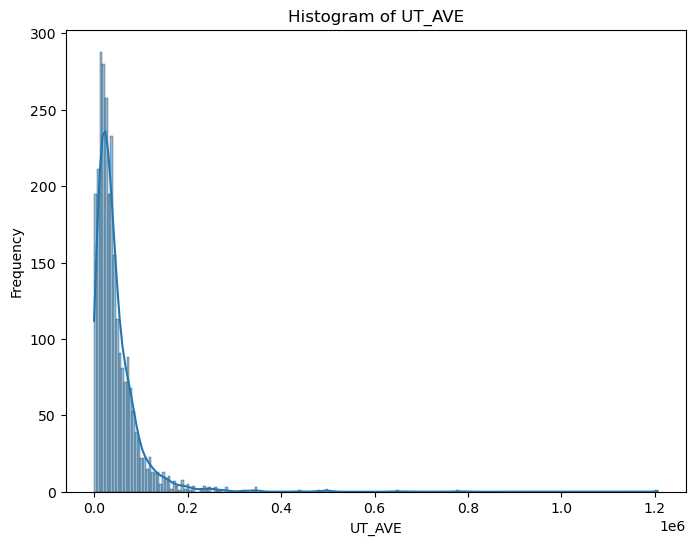

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


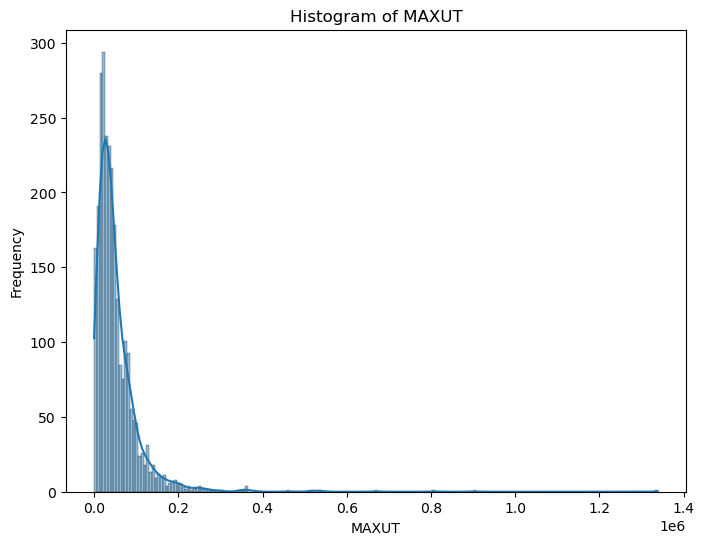

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


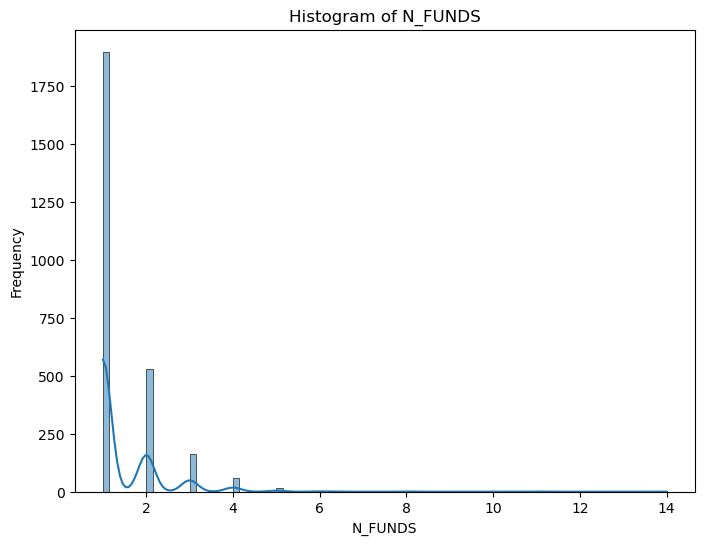

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


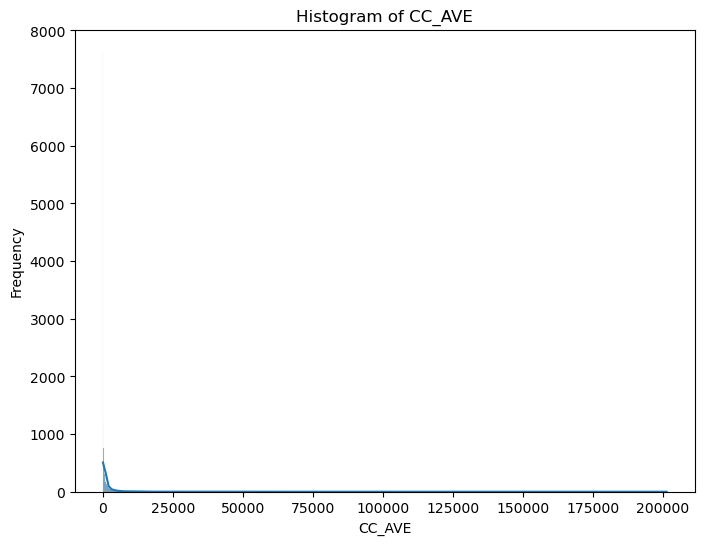

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


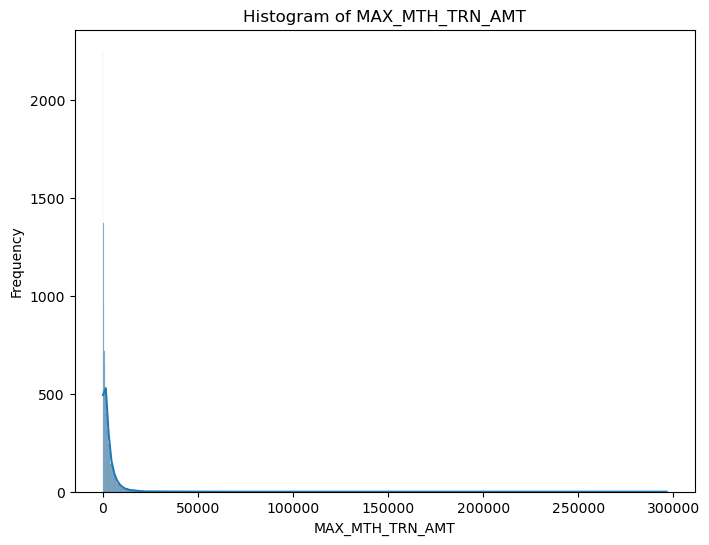

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


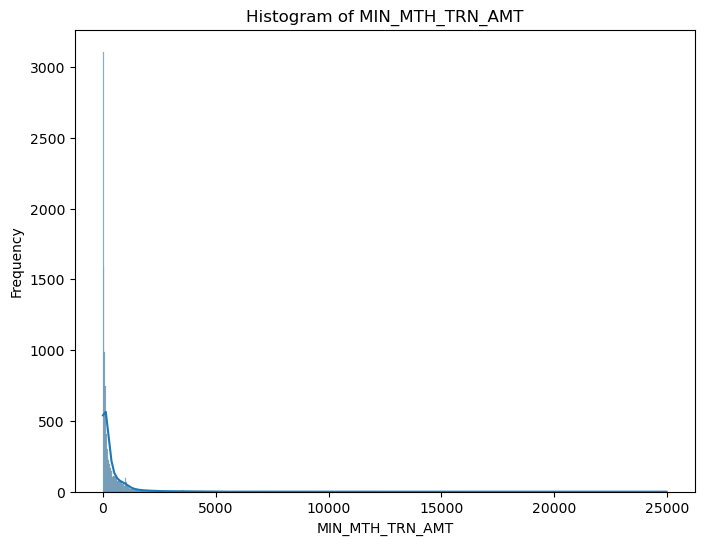

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


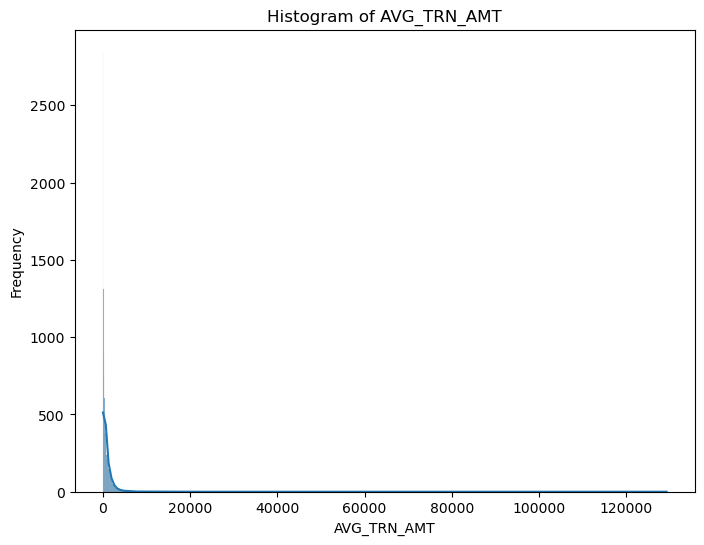

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


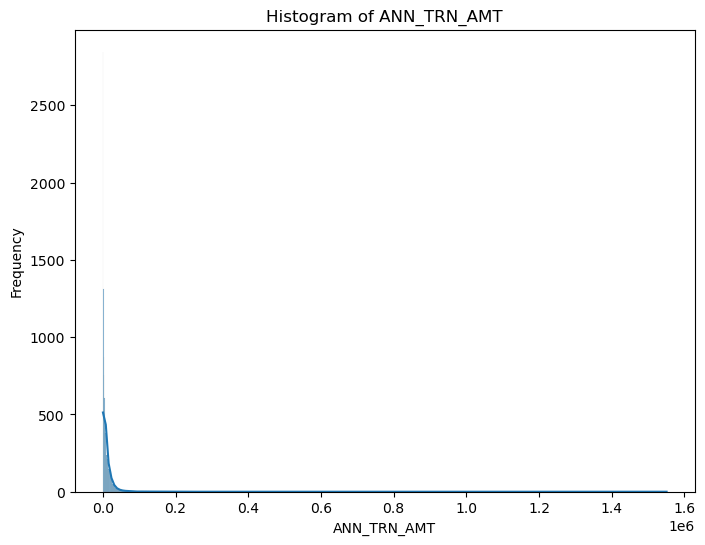

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


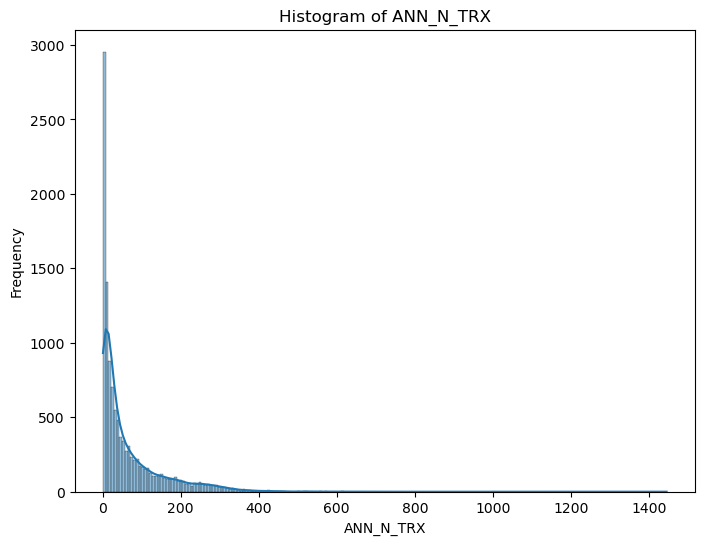

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


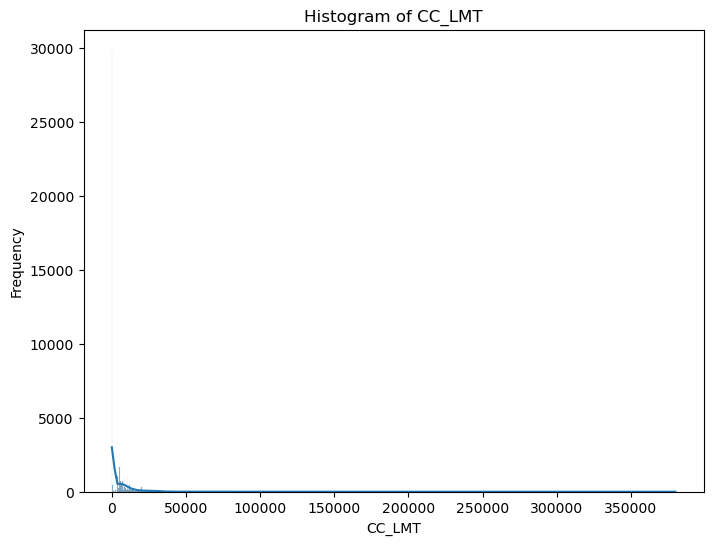

In [11]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(df[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:  # For discrete or ordinal variables
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x=column, data=df)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 5), 
                        textcoords = 'offset points')
        plt.show()

### Preliminary EDA - Level 1 EDA - (Some basic transformation on datatypes etc)
### Pls view Level 1 File